In [175]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
def my_function(arg1, arg2):
    """
    Write a function that adds 2 numbers and returns their sum
    """
    return arg1 + arg2

In [177]:
print(my_function(2, 9))

11


In [178]:
# Generators
def my_generator(arg1, arg2, n):
    """ Write a generator functions that adds 2 numbers n times and sums them"""
    i = 0
    result = 0
    while i < n:
        result += (arg1 + arg2)
        i += 1
        yield result

In [179]:
my_gen = my_generator(2, 9, 4)
next(my_gen)

11

In [180]:
next(my_gen)

22

In [181]:
next(my_gen)

33

In [182]:
# Exercise 5.01: Determining the nth term of an artithmetic sequence and series
def a_n(a1, d, n):
    """
    Return the n-th term of the arithmetic sequence.
    
    a1: first term of the sequence. Integer or Real
    n: the n-th term in the sequence.
    
    d: the common difference between each term in the arithmetic sequence.
    
    returns: n-th term. Integer or real
    
    """
    
    return a1 + ((n - 1) * d)
    

In [183]:
a_n(1, 2, 5)

9

In [184]:
def a_seq(a1, d, n):
    """
    Obtain the whole arithmetic sequence up to n.
    a1: first term of the sequence. Integer or Real
    d: common difference of the sequence. Integer or Real.
    n: number of terms in the sequence
    
    returns: sequence as a list.   
    
    """
    
    sequence = []
    for i in range(n):
        sequence.append(a1)
        a1 += d
    return sequence

In [185]:
a_seq(1, 2, 5)

[1, 3, 5, 7, 9]

In [186]:
def infinite_a_sequence(a1, d):
    """
    Generate an entire arithmetic sequence up to infinity.
    a1: first term of the sequence. Integer or Real
    d: common difference of the sequence. Integer or Real.
    
    returns: sequence as a generator.   
    
    """
    while True:
        yield a1
        a1 = a1 + d
        
gen = infinite_a_sequence(4, 3)


In [187]:
next(gen)

4

In [188]:
sum(a_seq(1, 5, 5))

55

In [189]:
def a_series(a1, d, n):
    """
    Calculate the sum of all terms in a finite arithmetic sequence.
    a1: first term in the the sequence. Integer or Real.
    d: common difference between terms in the sequence. Integer or Real.
    n: the number of terms in the sequence.
    
    returns: sum of sequence as Integer or Real.
    
    """
    
    result = n * (a1 + a_n(a1, d, n)) / 2
    return result
    

In [190]:
a_series(1, 5, 5)

55.0

In [191]:
# Chapter: 5.02 - Geometric Sequences
def n_geom(r, a, n):
    """
    Calculate the n-th term of a geometric sequence.
    r: common ratio between successive terms in the sequence.
    a: first term in the sequence. Integer or Real.
    n: the number of terms in the sequence.
    
    returns: the n-th term in the sequence. Integer or Real.
    """
    an = r ** (n-1) * a
    return an

n_geom(2, 1, 10)


512

In [192]:
def sum_n_geom(r, a, n):
    """
    Calculate the sum of all terms in a geometric sequence.
    r: common ratio between successive terms in the sequence.
    a: first term in the sequence. Integer or Real.
    n: the number of terms in the sequence.
    
    returns: the sum of all terms in the sequence. Integer or Real.
    
    """
    
    sum_n = (a * (1 - r ** n)) / (1 - r)
    return sum_n

sum_n_geom(2, 1, 10)

1023.0

In [193]:
def geom_seq(r, a, n):
    """
    Generate a finite geometric sequence.
    r: common ratio between successive terms in the sequence.
    a: first term in the sequence. Integer or Real.
    n: the number of terms in the sequence.
    
    returns: All terms in the sequence as a list.
    
    """
    sequence = []
    
    for i in range(n):
        sequence.append(a)
        a *= r
    
    return sequence
    
geom_seq(2, 1, 10)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

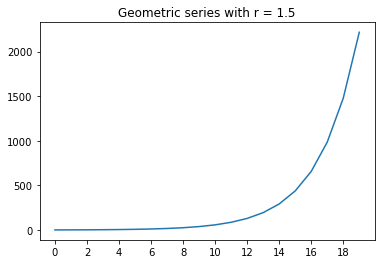

In [194]:
y = geom_seq(1.5, 1, 20)
x = np.arange(0, len(y))

plt.plot(x, y)
plt.xticks([x for x in x if x % 2 == 0])
plt.title("Geometric series with r = 1.5")
plt.show()

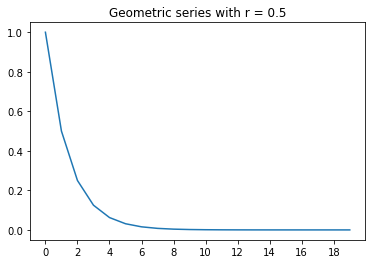

In [195]:
y = geom_seq(0.5, 1, 20)
x = np.arange(0, len(y))

plt.plot(x, y)
plt.xticks([x for x in x if x % 2 == 0])
plt.title("Geometric series with r = 0.5")
plt.show()

In [196]:
# Exercise 5.02: Writing a function to find the next term in a sequence
#1.
def find_ratio(*args):
    """
    Determine if the ratio between a list of numbers is consistent across all terms n / n-1
    
    *args: a sequence of numbers
    
    returns: a ratio (if it is consistent) or -1 (if it is not)
    """
    # Set arg0 to the first term
    arg0 = args[0]
    ratios = []
    
    # Calculate all ratios between terms and add to the ratios list
    for arg in args[1:]:
        ratio = round(arg/arg0, 8)
        arg0 = arg
        ratios.append(ratio)
        
    # If the set of ratios is len(1), then the ratio is consistent across all terms
    if len(set(ratios)) == 1:
        return ratio
    else:
        return -1

In [197]:
find_ratio(1, 2, 4, 8, 16)

2.0

In [198]:
def find_next(*args):
    """
    Calculate the next term in a sequence, if the sequence is geometric.
    
    *args: a sequence of numbers
    
    returns: the next term of a sequence (if geometric). Integer or Real.
    """
    ratio = find_ratio(*args)
    if ratio == -1:
        raise ValueError("The Sequence you entered is not a valid geometric sequence.\nPlease check input")
    else:
        return args[-1] * ratio

In [199]:
find_next(2, 4, 8, 16)

32.0

In [200]:
find_next(2, 4, 8, 16, 32)

64.0

In [201]:
# 5.03 - Recursive Sequences
def factorial(n):
    if n == 0 or n == 1:
        return 1
    elif n == 2:
        return 2
    else:
        return n * factorial(n - 1)

In [202]:
factorial(4)

24

In [203]:
# Exercise 5.04: Creating a custom recursive sequence
def p_n(n):
    """
    Function to generate a recursive sequence.
    n: the current term in the sequence
    returns: next sequence term based on calculation below:
    next = ( 3*p_n(n-2) - p_n(n-1)) / (p_n(n-3) + 1)
    
    """
    
    if n < 1:
        return -1
    elif n == 1:
        return 1
    elif n == 2:
        return 7
    elif n == 3:
        return 2
    else:
        return ( 3*p_n(n-2) - p_n(n-1)) / (p_n(n-3) + 1)


In [204]:
x = [p_n(x) for x in range(1, 30)]

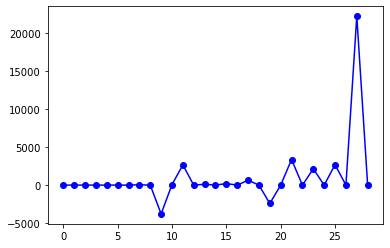

In [205]:
plt.plot(x, linestyle = '-', marker = 'o', color = 'b')

In [206]:
# Chapter 5.04 - Trigonometry
# Exercise 5.04 - Plotting a right-angled triangle
#1.
def find_hypothenuse(p1, p2):
    p3 = round((p1**2 + p2**2) ** 0.5, 8)
    return p3

#2.
def find_trig(adjacent, opposite, hypothenuse):
    """
    returns a tuple of (sin, cos, tan)
    """
    return (opposite/hypothenuse, adjacent/hypothenuse, opposite/adjacent)

3.
def plot_triangle(p1, p2, lw = 5):
    x = [0, p1, 0]
    y = [0, 0, p2]
    n = ['0', 'p1', 'p2']
    
    flg, ax = plt.subplots(figsize=(p1,p2))
    
    # Plot plots
    ax.scatter(x, y, s = 400, c = '#8C4799', alpha = 0.4)
    ax.annotate(find_hypothenuse(p1, p2), (p1/2, p2/2))
    
    # plot edges
    ax.plot([0, p1], [0, 0], lw = lw, color = 'r')
    ax.plot([0, 0], [0, p2], lw = lw, color = 'b')
    ax.plot([0, p1], [p2, 0], lw = lw, color = 'y')
    
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), va = 'center')
    plt.show()

(0.707106781123095, 0.707106781123095, 1.0)


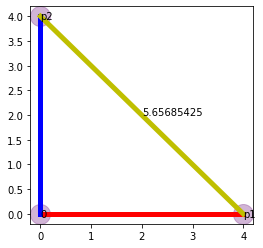

In [207]:
p1 = 4
p2 = 4

print(find_trig(p1, p2, find_hypothenuse(p1, p2)))
plot_triangle(p1, p2)

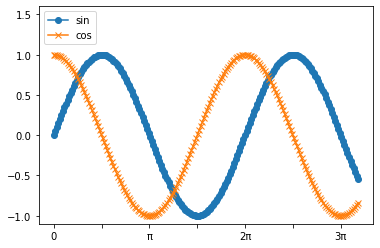

In [208]:
5. 
x = np.linspace(0, 10, 200)

sin = np.sin(x)
cos = np.cos(x)

plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi, 5*np.pi/2, 3 * np.pi],
          ['0','','\u03C0','','2\u03C0','','3\u03C0'])
plt.plot(x, sin, marker = 'o', label = 'sin')
plt.plot(x, cos, marker = 'x', label = 'cos')
plt.legend(loc = 'upper left')
plt.ylim(-1.1, 1.6)
plt.show()

In [209]:
# Chapter 5.05 - Inverse Trigonometric Functions
from math import asin, atan, acos, cos
x = 0.5

In [210]:
acos(x)

1.0471975511965979

In [211]:
asin(x)

0.5235987755982989

In [212]:
atan(x)

0.4636476090008061

In [213]:
x = 1.2

In [214]:
acos(x)

ValueError: math domain error

In [215]:
asin(x)

ValueError: math domain error

In [ ]:
atan(x)

In [ ]:
acos(cos(0.2))

In [ ]:
# Exercise 5.05: Find the shortest way to the treasure using inverse trig
# 1.
from math import pi

In [ ]:
# 2.
AC, BC = 33, 20
tan_th = BC/AC
print(tan_th)

In [ ]:
# 3.
theta = atan(tan_th)

# 4.
theta_degrees = 180 * theta / pi
print(theta)
print(theta_degrees)

In [ ]:
# 5.
AB = (AC**2 + BC**2) ** 0.5
print(AB)

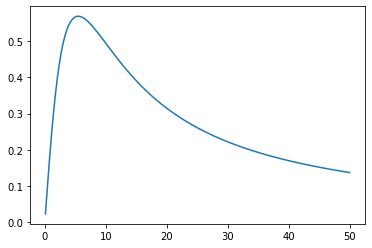

In [216]:
# Exercise 5.06: Find the optimal distance from an object
# 1.
x = np.linspace(0.1, 50, 2000)
y = np.arctan(7 * x / (30 + x**2))

plt.plot(x, y)
plt.show()

In [217]:
# 2.
ymax = max(y)
xmax = x[list(y).index(ymax)]

print(round(xmax, 2), round(ymax, 2))

5.47 0.57


In [218]:
# 3.
ymax_deg = round(ymax * 180 / np.pi, 2)
print(ymax_deg)

32.58


In [219]:
dist = []
nums = x = np.linspace(0.1, 50, 2000)
for i in nums:
    x = (3**2 + i**2) ** 0.5
    dist.append(np.tan(7/x))
dist_2 = np.arctan(np.array(dist))

In [220]:
max(dist_2)

1.564330257867936

In [222]:
# Chapter 5.07: Vectors
A = np.array([2, 10, 0])
B = np.array([9, 1, -1])

In [223]:
Amagn = np.sqrt(A.dot(A))
Bmagn = np.sqrt(B.dot(B))
print(Amagn)
print(Bmagn)

10.198039027185569
9.1104335791443


In [224]:
Amagn = np.linalg.norm(A)
Bmagn = np.linalg.norm(B)
print(Amagn)
print(Bmagn)

10.198039027185569
9.1104335791443


In [227]:
theta = acos(A.dot(B) / (Amagn * Bmagn))
print(theta * 180 / np.pi)

72.45999711391066


In [234]:
# Exercise 5.07 - Visualising Vectors
def plot_vectors(vec1, vec2, isSum = False):
    label1 = "A"
    label2 = "B"
    label3 = "A+B"
    orig = [0.0, 0.0]
    
    ax = plt.axes()
    ax.annotate(label1, [vec1[0] + 0.5, vec1[1] + 0.5])
    ax.annotate(label2, [vec2[0] + 0.5, vec2[1] + 0.5])
    
    if isSum:
        vec3 = [vec1[0] + vec2[0], vec1[1] + vec2[1]]
        ax.annotate(label3, [vec3[0] + 0.5, vec3[1] + 0.5])
        
    ax.arrow(*orig, *vec1, head_width = 0.4, head_length = 0.65)
    ax.arrow(*orig, *vec2, head_width = 0.4, head_length = 0.65, ec = 'blue')
    
    if isSum:
        ax.arrow(*orig, *vec3, head_width = 0.2, head_length = 0.25, ec = 'yellow')
    
    plt.grid()
    e = 3
    plt.xlim(min(vec1[0], vec2[0], 0) - e, max(vec1[0], vec2[0], 0) + e)
    plt.ylim(min(vec1[1], vec2[1], 0) - e, max(vec1[1], vec2[1], 0) + e)
    
    plt.title("Vector Sum", fontsize = 14)
    
    plt.show()
    plt.close()

In [235]:
def find_angle(vec1, vec2, isRadians = True, isSum = False):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    
    product12 = np.dot(vec1, vec2)
    cos_theta = product12 / (np.dot(vec1, vec1)**0.5 * np.dot(vec2, vec2)**0.5)
    cos_theta = round(cos_theta, 12)
    theta = np.arccos(cos_theta)
    
    plot_vectors(vec1, vec2, isSum = isSum)
    if isRadians:
        return theta
    else:
        return theta * 180 / np.pi

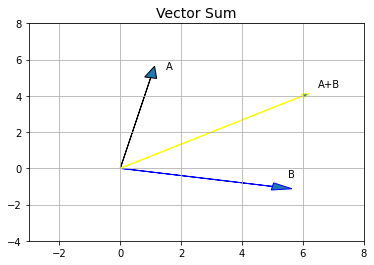

90.0

In [236]:
ve1 = [1, 5]
ve2 = [5, -1]
find_angle(ve1, ve2, isRadians = False, isSum = True)

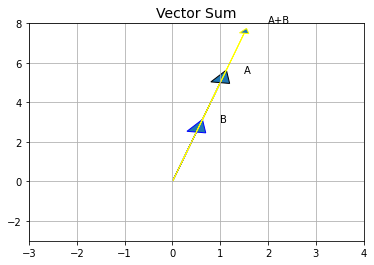

0.0

In [237]:
ve1 = [1, 5]
ve2 = [0.5, 2.5]
find_angle(ve1, ve2, isRadians = False, isSum = True)

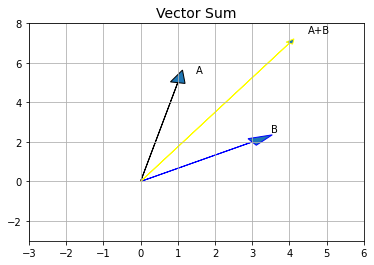

44.99999999996334

In [239]:
ve1 = [1, 5]
ve2 = [3, 2]
find_angle(ve1, ve2, isRadians = False, isSum = True)

In [248]:
# Activity 5.01 - Calculating your retirement plan using series.
# 1.
# Identify the variables:
salary = 0
current_balance = 0
monthly_contrib = 0.06
employer_contrib = 0.07
rate_of_return = 0
life_expectancy = 0
retirement_age = 68
fees = 0
employer_limit = 0.06
employee_limit = 18000

In [271]:
# 2.
def calc_value_year_n(year_n, salary, current_balance, rate_of_return,
                      current_age = 30, retirement_age = 68,
                      employee_contrib_pct = 0.06, employee_limit = 18000,
                      employer_contrib_pct = 0.06, employer_limit = 0.06, fees = 0):
    
    total_employee_contrib = 0
    total_employer_contrib = 0
    for i in range(year_n):
        employee_yearly_contrib = min((salary * monthly_contrib), employee_limit)
        employer_yearly_contrib = min(0.06, employer_contrib_pct) * salary
        total_yearly_contrib = employee_yearly_contrib + employer_yearly_contrib
        total_employee_contrib += employee_yearly_contrib
        total_employer_contrib += employer_yearly_contrib
        new_balance = (current_balance + total_yearly_contrib)
        current_balance = new_balance + (new_balance * rate_of_return)
    return (total_employee_contrib, total_employer_contrib, round(current_balance, 2))

In [281]:
calc_value_year_n(2, 80000, 0, 0.04)

(9600.0, 9600.0, 20367.36)

In [300]:
def calc_lifetime_value(year_n, salary, current_balance, rate_of_return,
                        current_age = 30, retirement_age = 68,
                        employee_contrib_pct = 0.06, employee_limit = 18000,
                        employer_contrib_pct = 0.06, employer_limit = 0.06, fees = 0):
    
    
    employee_contribs = []
    employer_contribs = []
    total_values = []
    for i in range(year_n):
        year_values = calc_value_year_n(i, salary, current_balance, rate_of_return,
                                       current_age, retirement_age, 
                                       employee_contrib_pct, employee_limit,
                                       employer_contrib_pct, employer_limit)
        employee_contribs.append(year_values[0])
        employer_contribs.append(year_values[1])
        total_values.append(year_values[2])
    return (employee_contribs, employer_contribs, total_values, year_n)

In [301]:
calc_lifetime_value(10, 80000, 0, 0.04)

([0,
  4800.0,
  9600.0,
  14400.0,
  19200.0,
  24000.0,
  28800.0,
  33600.0,
  38400.0,
  43200.0],
 [0,
  4800.0,
  9600.0,
  14400.0,
  19200.0,
  24000.0,
  28800.0,
  33600.0,
  38400.0,
  43200.0],
 [0,
  9984.0,
  20367.36,
  31166.05,
  42396.7,
  54076.56,
  66223.63,
  78856.57,
  91994.83,
  105658.63],
 10)

In [318]:
def plot_yearly_contribs(calc_lifetime_values_tuple):
    employee_contribs = calc_lifetime_values_tuple[0]
    employer_contribs = calc_lifetime_values_tuple[1]
    total_value = calc_lifetime_values_tuple[2]
    years = np.arange(0, calc_lifetime_values_tuple[3])
    
    fig, ax = plt.subplots()
    ax.plot(years, employee_contribs, c = 'r', label = 'employee')
    ax.plot(years, employer_contribs, c = 'b', label = 'employer')
    ax.plot(years, total_value, c = 'g', label = 'total')
    leg = ax.legend()


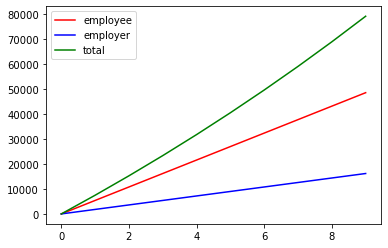

In [319]:
plot_yearly_contribs(calc_lifetime_value(10, 90000, 0, 0.04, employer_contrib_pct = 0.02))